## Notebook - Table of Contents


1. [**Basic**](#1.-Basic)  
    1.1 [**Importing the necessary libraries & installing EvalML**](#1.1-Importing-the-necessary-libraries-&-installing-EvalML)    
    1.2 [**Loading the income data and basic analysis**](#1.2-Loading-the-income-data-and-basic-analysis)         
2. [**Splitting into train-test set**](#2.-Splitting-into-train-test-set) 
3. [**Finding best ML model pipeline using EvalML**](#3.-Finding-best-ML-model-pipeline-using-EvalML)  
4. [**Interacting with pipelines**](#4.-Interacting-with-pipelines)                         
5. [**Evaluating the best pipeline on test data**](#5.-Evaluating-the-best-pipeline-on-test-data)  

### 1. Basic

#### 1.1 Importing the necessary libraries & installing EvalML

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#installing EvalML
!pip install EvalML

     |████████████████████████████████| 6.2 MB 1.1 MB/s 
     |████████████████████████████████| 91 kB 3.5 MB/s 
     |████████████████████████████████| 6.7 MB 5.9 MB/s 
     |████████████████████████████████| 148.9 MB 82 kB/s 
     |████████████████████████████████| 1.7 MB 32.7 MB/s 
     |████████████████████████████████| 18.0 MB 878 kB/s 
     |████████████████████████████████| 79.9 MB 170 kB/s 
     |████████████████████████████████| 5.7 MB 19.3 MB/s 
     |████████████████████████████████| 1.5 MB 35.2 MB/s 
  Created wheel for requirements-parser: filename=requirements_parser-0.2.0-py3-none-any.whl size=7655 sha256=77ddac570dbeedf2f77a36f89d5fa315e1180a2f64bb97ae1018671665ada29b
  Stored in directory: /root/.cache/pip/wheels/40/e4/ca/8af24ee94c3863d620d6a52793d82930f4d1d3515a5121d495
Successfully built requirements-parser
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.0.3
    Uninstalling pyzmq-22.0.3:
      Successfully uninstalled pyzmq-22.0.3
  Attempti

In [3]:
# getting list of problem types
import evalml
evalml.problem_types.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [4]:
# getting list of objectives
evalml.objectives.get_all_objective_names() 

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

#### 1.2 Loading the income data and basic analysis

In [5]:
df = pd.read_csv("/kaggle/input/income-classification/income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df[" income"].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

Text(0.5, 1.0, 'Pie chart of Income')

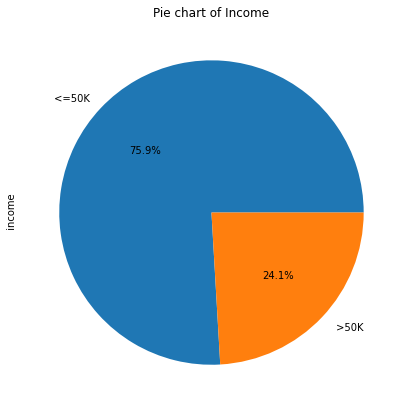

In [8]:
df[" income"].value_counts().plot.pie(autopct="%.1f%%",figsize=(7,7))
plt.title("Pie chart of Income")

### 2. Splitting into train-test set

In [9]:
X = df.drop(" income", axis=1)
y = df[" income"]

In [10]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary', test_size=.2)
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  26048
Size of test data :  6513


In [11]:
type(X_train)

woodwork.datatable.DataTable

In [12]:
X_train[[" workclass", " occupation"]].head().T

,,,,29101,10606,9414,1747,10677
Data Column,Physical Type,Logical Type,Semantic Tag(s),,,,,
workclass,category,Categorical,['category'],?,Private,Private,Private,Private
occupation,string,NaturalLanguage,[],?,Machine-op-inspct,Exec-managerial,Adm-clerical,Adm-clerical


### 3. Finding best ML model pipeline using EvalML

In [13]:
from evalml import AutoMLSearch

In [14]:
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type="binary", objective="F1")
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...



*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: catboost, lightgbm, random_forest, decision_tree, extra_trees, xgboost, linear_model



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean F1: 0.000

*****************************
* Evaluating Batch Number 1 *
*****************************

Decision Tree Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean F1: 0.633
Extra Trees Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean F1: 0.654
CatBoost Classifier w/ Imputer + Text Featurization Component:
	Starting cross validation
	Finished cross validation - mean F1: 0.683
Random Forest Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Finished cross validation - mean F1: 0.690
LightGBM Classifier w/ Imputer + Text Featurization Component + One Hot Encoder:
	Starting cross validation
	Fini

### 4. Interacting with pipelines

In [15]:
automl.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,XGBoost Classifier w/ Imputer + Text Featuriza...,0.727805,0.009281,0.731322,72.780530,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,5,LightGBM Classifier w/ Imputer + Text Featuriz...,0.724157,0.006780,0.723946,72.415695,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,4,Random Forest Classifier w/ Imputer + Text Fea...,0.689527,0.011830,0.698573,68.952711,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,3,CatBoost Classifier w/ Imputer + Text Featuriz...,0.682558,0.005797,0.686113,68.255763,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,8,Logistic Regression Classifier w/ Imputer + Te...,0.677314,0.014673,0.683200,67.731354,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,2,Extra Trees Classifier w/ Imputer + Text Featu...,0.654050,0.010403,0.665759,65.404968,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,1,Decision Tree Classifier w/ Imputer + Text Fea...,0.633105,0.014144,0.644577,63.310504,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,7,Elastic Net Classifier w/ Imputer + Text Featu...,0.388169,0.000021,0.388157,38.816868,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0.000000,0.000000,0.000000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [16]:
# getting details about best pipeline
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**********************************************************************************
* XGBoost Classifier w/ Imputer + Text Featurization Component + One Hot Encoder *
**********************************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Text Featurization Component
3. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
4. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100

Training
Training for binary problems.
Objective to optimize binary classification pipeline thresholds for: <evalml.objectives.standard_metrics.F1 object at 0x7f1f70739090>
Total training time (including CV): 156.1 seconds

Cross Valid

In [17]:
# getting details about 2nd best pipeline
automl.describe_pipeline(automl.rankings.iloc[1]["id"])


***********************************************************************************
* LightGBM Classifier w/ Imputer + Text Featurization Component + One Hot Encoder *
***********************************************************************************

Problem Type: binary
Model Family: LightGBM

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Text Featurization Component
3. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
4. LightGBM Classifier
	 * boosting_type : gbdt
	 * learning_rate : 0.1
	 * n_estimators : 100
	 * max_depth : 0
	 * num_leaves : 31
	 * min_child_samples : 20
	 * n_jobs : -1
	 * bagging_freq : 0
	 * bagging_fraction : 0.9

Training
Training for binary problems.
Objective to optimize binary classification pipeline thresholds for: <

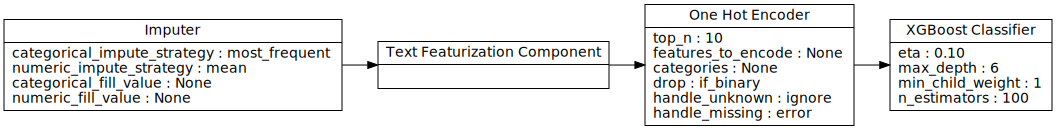

In [18]:
#visualizing best pipeline flow 
best_pipeline = automl.best_pipeline
best_pipeline.graph()

### 5. Evaluating the best pipeline on test data

In [19]:
best_pipeline.score(X_test, y_test, objectives = ["auc","f1"]) 

OrderedDict([('AUC', 0.9251058196281546), ('F1', 0.7250155183116077)])